In [26]:
import pandas as pd
import numpy as np
df = pd.read_csv('Q3combined.csv',index_col=0)

In [30]:
df_small = pd.read_csv("orders factory.csv")

In [29]:
def fill_interpolate_save(dfQ,path="",lam=0.9):
    
    df_small = dfQ
    
    # Stworzenie listy zbiorów z zamówieniami
    orders = df_small.groupby('order')['prod'].apply(set)
    co_occurrence_matrix = pd.DataFrame(index=df_small['prod'].unique(), columns=df_small['prod'].unique()).fillna(0)

    for order_products in orders:
        for product1 in order_products:
            for product2 in order_products:
                if product1 != product2:
                    co_occurrence_matrix.loc[product1, product2] += 1
                    
    product_counts = df_small.groupby('prod').count().order
    product_counts = product_counts.reindex(co_occurrence_matrix.index)
    scaled_matrix = co_occurrence_matrix / product_counts
    np.fill_diagonal(scaled_matrix.values, 1)
    
    daily_products = df_small.groupby('collect')['prod'].apply(set)
    co_occurrence_matrix_date = pd.DataFrame(index=df_small['prod'].unique(), columns=df_small['prod'].unique()).fillna(0)

    for products_on_date in daily_products:
        for product1 in products_on_date:
            for product2 in products_on_date:
                if product1 != product2:
                    co_occurrence_matrix_date.loc[product1, product2] += 1
                    
    product_counts_date = df_small.groupby('prod').count().collect
    product_counts_date = product_counts_date.reindex(co_occurrence_matrix_date.index)
    scaled_matrix_date = co_occurrence_matrix_date / product_counts_date
    np.fill_diagonal(scaled_matrix_date.values, 1)
    
    df_merged = scaled_matrix * lam + scaled_matrix_date * (1-lam)
    df_merged.to_csv(path)
    
    return df_merged
    
    

def prepare_datasets(df,lam=0.9):
    
    # Zmiana typu kolumny oznaczającej datę
    df = df_small
    df_small.collect = pd.to_datetime(df_small.collect)
    
    # Grupowanie danych po kwartałach każdego roku
    groups = df_small.groupby(pd.Grouper(key='collect', freq='Q'))
    
    # Podział danych ze względu na kwartały
    dfs = []
    for name, group in groups:
        dfs.append(pd.DataFrame(group))
    Q1df = dfs[0]
    Q2df = dfs[1]
    Q3df = dfs[2]
    Q4df = dfs[3]
    
    # Uzupełnienie (wyliczenie szansy na wspólne wystąpienie dwóch produktów w zamówieniu), iterpolacja ze względu
    # na zamówienie oraz datę oraz zapis danych do plików.
    
    df_merged_Q1 = fill_interpolate_save(Q1df,path="Q1combined.csv",lam=lam)
    df_merged_Q2 = fill_interpolate_save(Q2df,path="Q2combined.csv",lam=lam)
    df_merged_Q3 = fill_interpolate_save(Q3df,path="Q3combined.csv",lam=lam)
    df_merged_Q4 = fill_interpolate_save(Q4df,path="Q4combined.csv",lam=lam)
    
    return df_merged_Q1,df_merged_Q2,df_merged_Q3,df_merged_Q4
    

In [31]:
df_merged_Q1,df_merged_Q2,df_merged_Q3,df_merged_Q4 = prepare_datasets(df_small)

In [33]:
df_merged_Q1.shape

(597, 597)

In [34]:
df_merged_Q2.shape

(560, 560)

In [35]:
df_merged_Q3.shape

(528, 528)

In [36]:
df_merged_Q4.shape

(550, 550)

In [37]:
df_merged_Q1

,112082CGVPS3,331l,6001,4005-7,11162CGVM3,122082S,132082C,17162CHL,3710,37160,...,14162ca,11162SGPV,2020,2021,19162CRF,152082S,33100M,12451CHL,13162caz,18162ca
112082CGVPS3,1.000000,0.03125,0.007781,0.045570,0.025,0.002273,0.007692,0.009796,0.053571,0.1,...,0.05,0.016667,0.02,0.016667,0.1,0.1,0.1,0.025,0.05,0.1
331l,0.010638,1.00000,0.012392,0.088608,0.275,0.022727,0.011385,0.013878,0.097619,0.5,...,0.00,0.000000,0.00,0.000000,0.0,0.0,0.0,0.000,0.00,0.0
6001,0.011489,0.05375,1.000000,0.051266,0.050,0.002273,0.001538,0.013061,0.046429,0.1,...,0.00,0.000000,0.00,0.000000,0.1,0.1,0.1,0.025,0.05,0.1
4005-7,0.030638,0.17500,0.023343,1.000000,0.500,0.043182,0.012923,0.008571,0.150000,0.5,...,0.00,0.000000,0.00,0.000000,0.0,0.0,0.0,0.000,0.00,0.0
11162CGVM3,0.000426,0.01375,0.000576,0.012658,1.000,0.022727,0.003385,0.004490,0.011905,0.5,...,0.00,0.000000,0.00,0.000000,0.0,0.0,0.0,0.000,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152082S,0.000426,0.00000,0.000288,0.000000,0.000,0.000000,0.000000,0.000000,0.001190,0.0,...,0.00,0.000000,0.00,0.000000,0.0,1.0,0.1,0.025,0.05,0.1
33100M,0.000426,0.00000,0.000288,0.000000,0.000,0.000000,0.000000,0.000000,0.001190,0.0,...,0.00,0.000000,0.00,0.000000,0.0,0.1,1.0,0.025,0.05,0.1
12451CHL,0.000426,0.00000,0.000288,0.000000,0.000,0.000000,0.000000,0.000000,0.001190,0.0,...,0.00,0.000000,0.00,0.000000,0.0,0.1,0.1,1.000,0.05,0.1
13162caz,0.000426,0.00000,0.000288,0.000000,0.000,0.000000,0.000000,0.000000,0.001190,0.0,...,0.00,0.000000,0.00,0.000000,0.0,0.1,0.1,0.025,1.00,1.0


In [214]:
df_merged_Q2

,37120,652082C,8008,9047,64162C,8042,8051,50105,50106,50107,...,7096,7099,8049,88036,88045,2503c,50603,1303S,6002,2016
37120,1.000000,0.200000,0.106944,0.4125,0.033796,0.098446,0.053226,0.009756,0.006311,0.014650,...,0.166667,1.0,0.125,0.052632,0.2,0.1,0.01,0.003333,0.02,0.0125
652082C,0.006593,1.000000,0.016667,0.1375,0.009259,0.006218,0.004839,0.000443,0.000485,0.001274,...,0.000000,0.0,0.000,0.000000,0.0,0.0,0.00,0.000000,0.00,0.0000
8008,0.042308,0.200000,1.000000,0.1750,0.025926,0.137306,0.075000,0.004213,0.002913,0.007006,...,0.000000,0.0,0.000,0.000000,0.0,0.0,0.00,0.000000,0.00,0.0000
9047,0.018132,0.183333,0.019444,1.0000,0.006019,0.002591,0.002419,0.000665,0.000971,0.001911,...,0.000000,0.0,0.000,0.000000,0.0,0.0,0.00,0.000000,0.00,0.0000
64162C,0.040110,0.333333,0.077778,0.1625,1.000000,0.066321,0.049194,0.004213,0.004369,0.008280,...,0.166667,1.0,0.125,0.052632,0.2,0.1,0.01,0.000000,0.00,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2503c,0.000549,0.000000,0.000000,0.0000,0.000463,0.000518,0.000403,0.000000,0.000000,0.000637,...,0.000000,0.0,0.000,0.000000,0.0,1.0,0.01,0.000000,0.00,0.0000
50603,0.000549,0.000000,0.000000,0.0000,0.000463,0.000518,0.000403,0.000000,0.000000,0.000637,...,0.000000,0.0,0.000,0.000000,0.0,0.1,1.00,0.000000,0.00,0.0000
1303S,0.000549,0.000000,0.000000,0.0000,0.000000,0.000518,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000,0.000000,0.0,0.0,0.00,1.000000,0.00,0.0000
6002,0.000549,0.000000,0.000000,0.0000,0.000000,0.000518,0.000403,0.000222,0.000485,0.000000,...,0.000000,0.0,0.000,0.000000,0.0,0.0,0.00,0.000000,1.00,0.0125


In [215]:
df_merged_Q3

,50108,50118,50102,9026,122082C,14162S,220226,13451S,9018,15162C,...,1103CRGV38UP,50100,25451CR,16162CP,142082C,1903CFN,1162CGVPPS4UP,6042,6044,1603SP
50108,1.000000,0.038462,0.015810,0.030769,0.000455,0.000787,0.028571,0.001240,0.001437,0.001351,...,0.000000,0.00,0.006667,0.000000,0.0,0.033333,0.002703,0.1,0.1,0.000000
50118,0.020833,1.000000,0.001581,0.010256,0.000909,0.001575,0.014286,0.001240,0.001437,0.000901,...,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
50102,0.333333,0.061538,1.000000,0.064103,0.001818,0.002362,0.028571,0.004339,0.004310,0.001802,...,0.028571,0.02,0.010000,0.004167,0.1,0.033333,0.000000,0.0,0.0,0.009091
9026,0.025000,0.015385,0.002470,1.000000,0.002727,0.003937,0.042857,0.005165,0.006897,0.005856,...,0.028571,0.02,0.003333,0.004167,0.1,0.000000,0.000000,0.0,0.0,0.009091
122082C,0.002083,0.007692,0.000395,0.015385,1.000000,0.024409,0.142857,0.002273,0.006897,0.001351,...,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1903CFN,0.002083,0.000000,0.000099,0.000000,0.000000,0.000000,0.000000,0.000207,0.000287,0.000000,...,0.000000,0.00,0.003333,0.000000,0.0,1.000000,0.000000,0.0,0.0,0.000000
1162CGVPPS4UP,0.002083,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000207,0.008621,0.000000,...,0.000000,0.00,0.006667,0.000000,0.0,0.000000,1.000000,0.1,0.1,0.000000
6042,0.002083,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000287,0.000000,...,0.000000,0.00,0.003333,0.000000,0.0,0.000000,0.002703,1.0,1.0,0.000000
6044,0.002083,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000287,0.000000,...,0.000000,0.00,0.003333,0.000000,0.0,0.000000,0.002703,1.0,1.0,0.000000


In [216]:
df_merged_Q4

,331l,64162,16162S,12162CB,5005-7,50099,50500,8001,132082CP,37170,...,18162crf,336XL,50109,50112,50121,336XXL,51005,63026,88038,88045
331l,1.000000,0.039130,0.026761,0.042308,0.150000,0.033333,0.092857,0.1,0.002857,0.050000,...,1.0,1.0,1.0,1.0,1.0,0.1,0.009091,0.1,0.1,0.1
64162,0.029670,1.000000,0.016197,0.042308,0.054167,0.008333,0.092857,0.1,0.002857,0.017857,...,1.0,1.0,1.0,1.0,1.0,0.1,0.090909,1.0,1.0,1.0
16162S,0.041758,0.033333,1.000000,0.038462,0.045833,0.025000,0.078571,0.1,0.002857,0.010714,...,1.0,1.0,1.0,1.0,1.0,0.1,0.009091,0.1,0.1,0.1
12162CB,0.012088,0.015942,0.007042,1.000000,0.045833,0.008333,0.007143,0.1,0.028571,0.007143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
5005-7,0.039560,0.018841,0.007746,0.042308,1.000000,0.008333,0.007143,0.1,0.002857,0.103571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336XXL,0.001099,0.001449,0.000704,0.000000,0.000000,0.000000,0.007143,0.0,0.000000,0.000000,...,0.1,0.1,0.1,0.1,0.1,1.0,0.009091,0.1,0.1,0.1
51005,0.001099,0.014493,0.000704,0.000000,0.000000,0.000000,0.007143,0.0,0.000000,0.000000,...,0.1,0.1,0.1,0.1,0.1,0.1,1.000000,1.0,1.0,1.0
63026,0.001099,0.014493,0.000704,0.000000,0.000000,0.000000,0.007143,0.0,0.000000,0.000000,...,0.1,0.1,0.1,0.1,0.1,0.1,0.090909,1.0,1.0,1.0
88038,0.001099,0.014493,0.000704,0.000000,0.000000,0.000000,0.007143,0.0,0.000000,0.000000,...,0.1,0.1,0.1,0.1,0.1,0.1,0.090909,1.0,1.0,1.0


In [40]:
dfQ1_input = np.array(df_merged_Q1)

In [211]:
dfQ2_input = np.array(df_merged_Q2)

In [212]:
dfQ3_input = np.array(df_merged_Q3)

In [213]:
dfQ4_input = np.array(df_merged_Q4)

In [76]:
import matplotlib.pyplot as plt
def make_plot(network,df_m):   
    winners = []
    df1 = np.array(df_m)

    # Iterujemy po danych wejściowych
    for input_vector in df1:
        # Obliczamy odległość euklidesową między danymi wejściowymi a wagami neuronów
        distances = np.linalg.norm(input_vector - network.weights, axis=2)

        # Znajdujemy indeks zwycięzcy (najbliższego neuronu) na podstawie minimalnej odległości
        winner = np.unravel_index(np.argmin(distances), distances.shape)

        # Dodajemy indeks zwycięzcy do listy winners
        winners.append(winner)

    # Konwertujemy listę winners na numpy array, aby uzyskać finalny wynik w postaci array
    clusters = np.array(winners)
    
    # Klastry/Neurony w postaci 2D-indeksów (i, j)
    clusters_i = clusters[:,0]
    clusters_j = clusters[:,1]

    # Wizualizacja na mapie
    fig, ax = plt.subplots(figsize=(10, 8))
    m,n = network.output_shape
    for i in range(m):
        for j in range(n):
            cluster_mask = np.logical_and(clusters_i == i, clusters_j == j)
            if np.any(cluster_mask):
                num_clusters = np.sum(cluster_mask)
                ax.scatter(i, j, c='blue', s=10*num_clusters)

    ax.set_xlabel('Indeks wiersza')
    ax.set_ylabel('Indeks kolumny')
    plt.xticks(np.arange(0, m, 1))
    plt.yticks(np.arange(0, n, 1))
    plt.grid(True)
    plt.show()

In [98]:
class KohonenNetwork_simple:
    def __init__(self, input_size, output_shape, alpha, sigma, lambd, option):
        self.input_size = input_size
        self.output_shape = output_shape
        self.alpha = alpha
        self.sigma = sigma
        self.lambd = lambd
        self.option = option
        self.weights = np.random.rand(output_shape[0], output_shape[1], input_size)
    
    def gaussian_function(self, x):
        # Funkcja Gaussowska
        return np.exp(-(x**2) / (2 * self.sigma**2))
    
    def derivative_gaussian_function(self, x):
        # Minus druga pochodna funkcji Gaussowskiej
        return (x**2 / self.sigma**2 - 1) * np.exp(-(x**2) / (2 * self.sigma**2))
    
    def update_weights(self, input_vector):
        # Znajdowanie zwycięzcy
        distances = np.linalg.norm(input_vector - self.weights, axis=2)
        winner = np.unravel_index(np.argmin(distances), distances.shape)
        
        # Aktualizacja wag dla zwycięzcy i jego sąsiadów
        for i in range(self.output_shape[0]):
            for j in range(self.output_shape[1]):
                # Obliczanie odległości między zwycięzcą a neuronem na mapie
                distance = np.linalg.norm(np.array(winner) - np.array([i, j]))
                if (self.option == 0):
                # Aktualizacja wag z użyciem funkcji wygaszającej
                    self.weights[i, j] += self.alpha * self.gaussian_function(distance / self.sigma) * (input_vector - self.weights[i, j])
                else:
                    self.weights[i, j] += self.alpha * self.derivative_gaussian_function(distance / self.sigma) * (input_vector - self.weights[i, j])

    def train(self, input_vectors, epochs):
        for epoch in range(epochs):
            for input_vector in input_vectors:
                self.update_weights(input_vector)
                
            # Aktualizacja współczynnika uczenia
            self.alpha = self.alpha * np.exp(-epoch / self.lambd)
            if epoch % 10 ==0:
                print(epoch)

In [99]:
input_size = 597
output_shape = (12,12)
alpha = 0.1
sigma = 1.0
lambd = 1000
network = KohonenNetwork_simple(input_size, output_shape, alpha, sigma, lambd,0)
network.train(dfQ1_input,50)

0
10
20
30
40


In [217]:
input_size = 560
output_shape = (12,12)
alpha = 0.1
sigma = 1.0
lambd = 1000
network_Q2 = KohonenNetwork_simple(input_size, output_shape, alpha, sigma, lambd,0)
network_Q2.train(dfQ2_input,100)

0
10
20
30
40
50
60
70
80
90


In [218]:
input_size = 528
output_shape = (12,12)
alpha = 0.1
sigma = 1.0
lambd = 1000
network_Q3 = KohonenNetwork_simple(input_size, output_shape, alpha, sigma, lambd,0)
network_Q3.train(dfQ3_input,100)

0
10
20
30
40
50
60
70
80
90


In [219]:
input_size = 550
output_shape = (12,12)
alpha = 0.1
sigma = 1.0
lambd = 1000
network_Q4 = KohonenNetwork_simple(input_size, output_shape, alpha, sigma, lambd,0)
network_Q4.train(dfQ4_input,100)

0
10
20
30
40
50
60
70
80
90


In [101]:
kohonen_net = KohonenNetwork(input_size=597,
                             output_shape=(12, 12),
                             alpha=0.1,
                             sigma=1.0,
                             lambd=1000,
                             option=0,
                             neuron_capacity=8)

In [102]:
kohonen_net.train(dfQ1_input, 50)

0
10
20
30
40


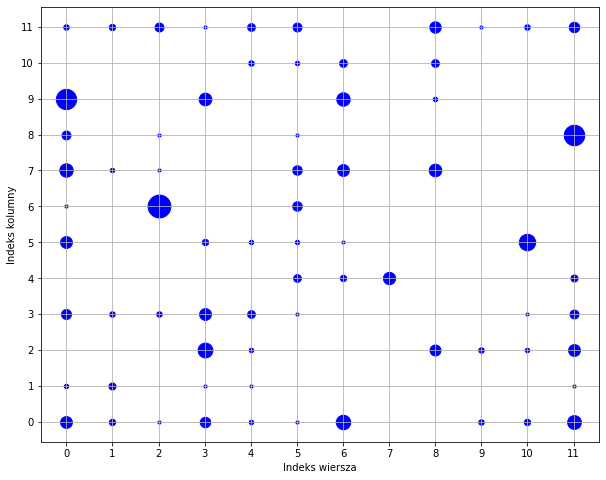

In [103]:
make_plot(kohonen_net,df_merged_Q1)

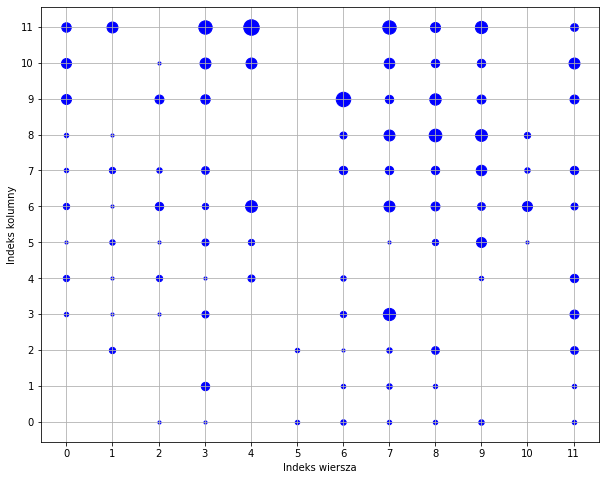

In [100]:
make_plot(network,df_merged_Q1)

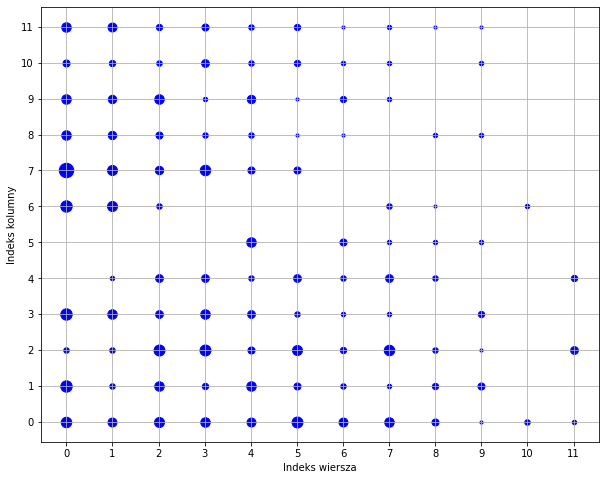

In [220]:
make_plot(network_Q2,df_merged_Q2)

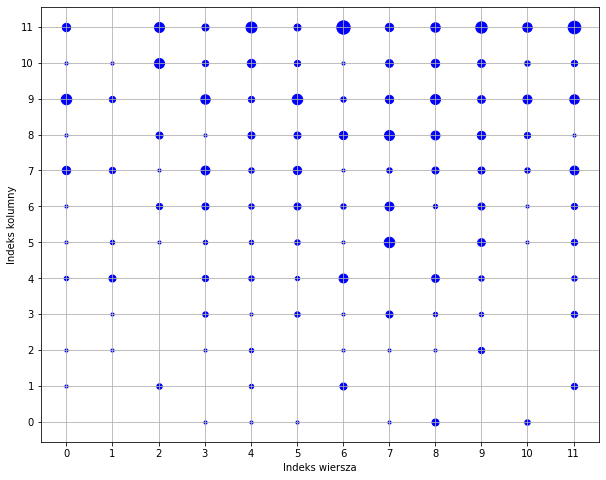

In [221]:
make_plot(network_Q3,df_merged_Q3)

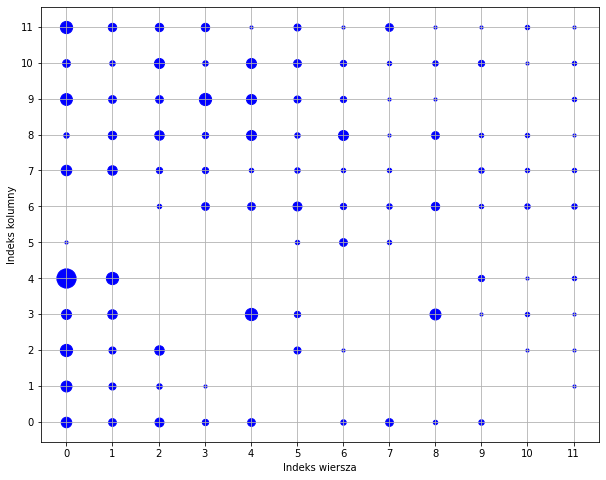

In [222]:
make_plot(network_Q4,df_merged_Q4)

## Tworzenie Planu Magazynu losowo

In [195]:
def generate_random_coordinates(num_rows, map_size, max_capacity, num_empty):
    coordinates = []
    coordinate_counts = np.zeros(map_size, dtype=int)
    
    # Create a list of all possible coordinates
    all_coordinates = [(x, y) for x in range(map_size[0]) for y in range(map_size[1])]
    
    # Randomly select coordinates to be left empty
    empty_coordinates = set()
    for _ in range(num_empty):
        empty = all_coordinates.pop(np.random.randint(len(all_coordinates)))
        empty_coordinates.add(empty)

    while len(coordinates) < num_rows:
        x, y = np.random.randint(0, map_size[0]), np.random.randint(0, map_size[1])
        
        if coordinate_counts[x, y] < max_capacity and (x, y) not in empty_coordinates:
            coordinates.append([x, y])
            coordinate_counts[x, y] += 1
            
    return np.array(coordinates)


In [242]:
def map_for_random(random_coordinates):
    # Klastry/Neurony w postaci 2D-indeksów (i, j)
    clusters_i = random_coordinates[:,0]
    clusters_j = random_coordinates[:,1]

    # Wizualizacja na mapie
    fig, ax = plt.subplots(figsize=(10, 8))
    m,n = network.output_shape
    for i in range(m):
            for j in range(n):
                cluster_mask = np.logical_and(clusters_i == i, clusters_j == j)
                if np.any(cluster_mask):
                    num_clusters = np.sum(cluster_mask)
                    ax.scatter(i, j, c='blue', s=10*num_clusters)

    ax.set_xlabel('Indeks wiersza')
    ax.set_ylabel('Indeks kolumny')
    plt.xticks(np.arange(0, m, 1))
    plt.yticks(np.arange(0, n, 1))
    plt.grid(True)
    plt.show()

In [244]:
num_rows = 597
map_size = (12, 12)
max_capacity = 10
num_empty= 30
random_coordinates_Q1 = generate_random_coordinates(num_rows, map_size, max_capacity,num_empty)

In [249]:
num_rows = 560
map_size = (12, 12)
max_capacity = 10
num_empty= 18
random_coordinates_Q2 = generate_random_coordinates(num_rows, map_size, max_capacity,num_empty)

In [250]:
num_rows = 528
map_size = (12, 12)
max_capacity = 10
num_empty= 29
random_coordinates_Q3 = generate_random_coordinates(num_rows, map_size, max_capacity,num_empty)

In [251]:
num_rows = 550
map_size = (12, 12)
max_capacity = 10
num_empty= 28
random_coordinates_Q4 = generate_random_coordinates(num_rows, map_size, max_capacity,num_empty)

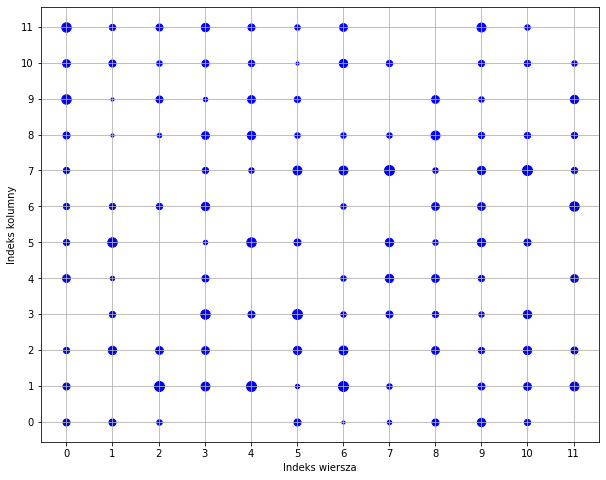

In [245]:
map_for_random(random_coordinates_Q1)

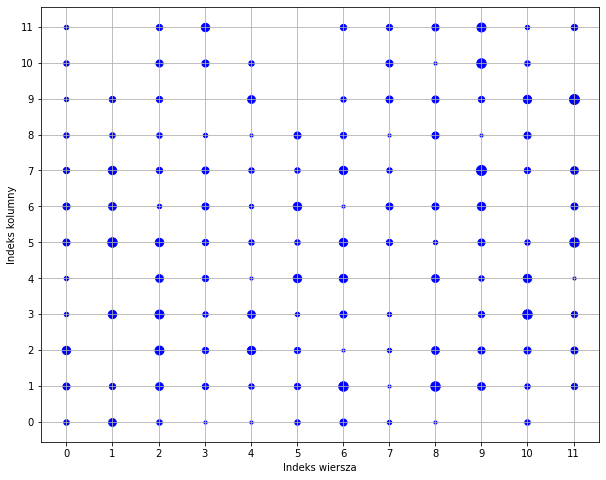

In [252]:
map_for_random(random_coordinates_Q2)

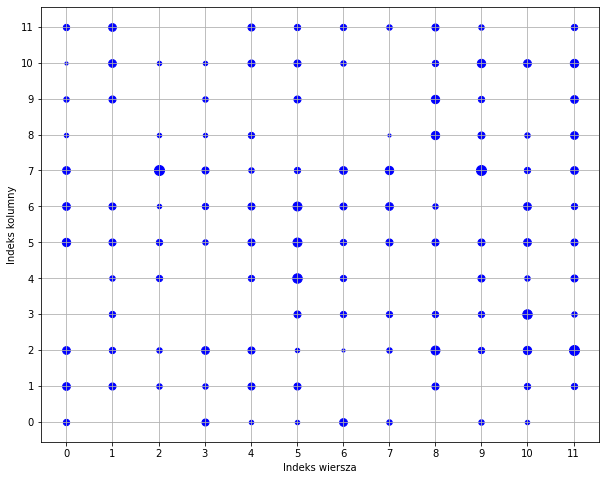

In [253]:
map_for_random(random_coordinates_Q3)

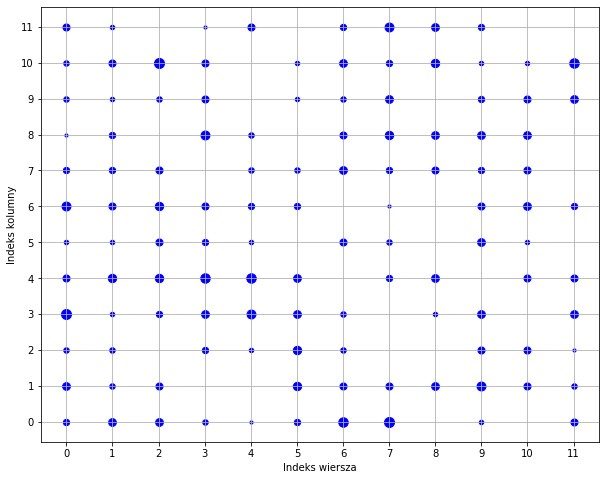

In [254]:
map_for_random(random_coordinates_Q4)

In [263]:
cluster_Q1_Random = {}
products = df_merged_Q1.columns

for product, coords in zip(products, random_coordinates_Q1):
    cluster_Q1_Random[product] = tuple(coords)

In [264]:
cluster_Q2_Random = {}
products = df_merged_Q2.columns

for product, coords in zip(products, random_coordinates_Q2):
    cluster_Q2_Random[product] = tuple(coords)

In [265]:
cluster_Q3_Random = {}
products = df_merged_Q3.columns

for product, coords in zip(products, random_coordinates_Q3):
    cluster_Q3_Random[product] = tuple(coords)

In [266]:
cluster_Q4_Random = {}
products = df_merged_Q4.columns

for product, coords in zip(products, random_coordinates_Q4):
    cluster_Q4_Random[product] = tuple(coords)

In [271]:
cluster_Q4_Random

{'331l': (8, 4),
 '64162': (3, 8),
 '16162S': (1, 0),
 '12162CB': (8, 8),
 '5005-7': (9, 1),
 '50099': (9, 2),
 '50500': (5, 2),
 '8001': (8, 4),
 '132082CP': (10, 8),
 '37170': (8, 4),
 '8032': (7, 11),
 '8051': (9, 10),
 '4007-9': (8, 10),
 '8008': (9, 3),
 '8042': (1, 10),
 '15162C': (6, 5),
 '25162AC': (9, 8),
 '67451C': (0, 3),
 '8015': (0, 8),
 '9156': (2, 4),
 '11162GVCA4': (1, 10),
 '14162C': (0, 0),
 '3005-7': (4, 5),
 '3007-9': (2, 10),
 '37171': (0, 7),
 '9026': (6, 11),
 '9046': (8, 11),
 '93451CV4.2': (9, 8),
 '11451CG36': (11, 10),
 '12451C': (10, 9),
 '13451C': (7, 9),
 '10451C': (1, 8),
 '11162GVPCA3': (0, 1),
 '112082CGVPS3': (8, 4),
 '37120': (3, 4),
 '65451': (7, 9),
 '19162CAP': (1, 1),
 '13162CA': (8, 8),
 '13162CAF': (9, 5),
 '14162S': (10, 6),
 '12451S': (8, 7),
 '132082C': (9, 8),
 '6006': (1, 6),
 '9014': (8, 3),
 '17162CHL': (3, 8),
 '331m': (1, 10),
 '17162CA': (7, 9),
 '9081': (5, 3),
 '11451GVC28': (0, 4),
 '14162SP': (4, 3),
 '11451GS': (0, 1),
 '14451CV':

## Liczenie dystansu

liczenie dystansu w pojednycznym zamówieniu, dostajemy odpowiedż jaki jest najkrótszy dystans aby złapać każdy przedmiot

In [164]:
#używamy odległości euklidesowej - czyli po wymiarach na mapie
def euclidean_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

#two_opt algorytm
def two_opt(route, dist_func):
    best = route
    improved = True
    while improved:
        improved = False
        for i in range(1, len(route) - 2):
            for j in range(i + 1, len(route)):
                if j - i == 1:
                    continue
                new_route = route[:]
                new_route[i:j] = route[j - 1:i - 1:-1]
                if dist_func(new_route) < dist_func(best):
                    best= new_route
                    improved = True
    return best

#suma dystansów
def total_distance(route):
    dist=0
    for i in range(1, len(route)):
        dist += euclidean_distance(route[i-1], route[i])
    dist +=euclidean_distance(route[-1], route[0])
    return dist

#
def min_distance_to_collect_products(product_coordinates):
    #wejściowe dane to zamówienie {'prodA': (10, 20), 'prodB': (19, 30), 'prodC': (30, 11)}

    initial_route = list(product_coordinates.values())
    optimized_route = two_opt(initial_route, total_distance)
    min_distance = total_distance(optimized_route)

    return min_distance

In [227]:
#funkcja zwraca słownik, dla jakiego produktu jaki obszar na mapie (neuron)

def calculate_clusters(df_merged,network_ch):  
    winners = []
    df1 = np.array(df_merged)

    # przejscie po danych wejściowych
    for input_vector in df1:
            # obliczamy odległość euklidesową między danymi wejściowymi a wagami neuronów
            distances = np.linalg.norm(input_vector - network_ch.weights, axis=2)

            # znaajdujemy indeks zwycięzcy (najbliższego neuronu) na podstawie minimalnej odległości
            winner = np.unravel_index(np.argmin(distances), distances.shape)

            # dodajemy indeks zwycięzcy do listy winners
            winners.append(winner)

        # konwertujemy listę winners na numpy array, aby uzyskać finalny wynik w postaci array
    clusters = np.array(winners)
    products = df_merged.columns
    product_coordinates = {}

    for product, coords in zip(products, clusters):
        product_coordinates[product] = tuple(coords)
    return product_coordinates

In [295]:
cluster_Q1 = calculate_clusters(df_merged_Q1,network)

In [232]:
cluster_Q2 = calculate_clusters(df_merged_Q2,network_Q2)

In [233]:
cluster_Q3 = calculate_clusters(df_merged_Q3,network_Q3)

In [234]:
cluster_Q4 = calculate_clusters(df_merged_Q4,network_Q4) 

In [312]:
cluster_Q1

{'112082CGVPS3': (0, 11),
 '331l': (1, 8),
 '6001': (2, 7),
 '4005-7': (11, 0),
 '11162CGVM3': (10, 6),
 '122082S': (9, 6),
 '132082C': (11, 6),
 '17162CHL': (2, 7),
 '3710': (2, 7),
 '37160': (9, 6),
 '18162HL': (3, 7),
 '9081': (2, 9),
 '122082C': (5, 0),
 '14162SP': (11, 2),
 '37120': (0, 8),
 '9018': (11, 1),
 '9030': (0, 9),
 '9031': (1, 11),
 '9048': (0, 9),
 '3005-7': (0, 8),
 '3711': (11, 6),
 '8015': (0, 3),
 '8052': (0, 10),
 '8053': (0, 10),
 '18451C': (2, 9),
 '4007-9': (0, 9),
 '64162C': (0, 6),
 '64451C': (9, 7),
 '99162C': (0, 11),
 '14162C': (2, 9),
 '3007-9': (0, 9),
 '331xxl': (0, 9),
 '9020': (11, 2),
 '9022': (0, 9),
 '9156': (0, 9),
 '12162C': (1, 7),
 '12162CB': (10, 6),
 '1162CGVPMPS3UP': (6, 9),
 '8051': (0, 7),
 '19451S': (0, 7),
 '8032': (0, 4),
 '8044': (0, 6),
 '12451S': (0, 10),
 '1162SGVPPS4UP': (11, 3),
 '18451CB': (9, 6),
 '10451S': (4, 10),
 '15162C': (2, 9),
 '9046': (11, 6),
 '93451CV4.2': (5, 0),
 '92451C-1.5': (10, 6),
 '18451SB': (2, 9),
 '112082CG

In [311]:
cluster_Q2

{'37120': (7, 9),
 '652082C': (7, 0),
 '8008': (10, 6),
 '9047': (8, 0),
 '64162C': (5, 10),
 '8042': (9, 8),
 '8051': (9, 8),
 '50105': (4, 5),
 '50106': (4, 5),
 '50107': (4, 5),
 '12162CB': (7, 0),
 '13451S': (0, 11),
 '8024': (7, 0),
 '9014': (11, 0),
 '4005-7': (8, 8),
 '14162C': (9, 1),
 '132082C': (7, 0),
 '65451': (5, 3),
 '9081': (8, 1),
 '19451S': (8, 8),
 '8041': (7, 11),
 '9022': (7, 10),
 '9046': (7, 0),
 '9048': (7, 10),
 '67162C': (4, 9),
 '18162SB': (4, 9),
 '67451': (4, 9),
 '97162CHL': (7, 0),
 '3710': (5, 10),
 '19451C': (5, 11),
 '17162CHL': (0, 10),
 '50500': (1, 9),
 '17451SHL': (1, 4),
 '122082C': (8, 0),
 '8017': (1, 9),
 '18162CB': (8, 5),
 '1162CGVMPS3UP': (2, 9),
 '15162C': (8, 5),
 '7093': (7, 0),
 '15451C': (4, 10),
 '331m': (4, 10),
 '132082CP': (6, 0),
 '1702S': (7, 0),
 '9028': (4, 9),
 '37170': (4, 10),
 '8047': (1, 11),
 '11451CG36': (3, 10),
 '11451SG36': (2, 10),
 '12451CZ': (7, 1),
 '16451S': (4, 11),
 '18451C': (11, 4),
 '64162': (4, 9),
 '1162CGVP

In [310]:
cluster_Q3

{'50108': (11, 3),
 '50118': (10, 7),
 '50102': (11, 5),
 '9026': (6, 1),
 '122082C': (5, 3),
 '14162S': (8, 0),
 '220226': (7, 3),
 '13451S': (3, 4),
 '9018': (0, 4),
 '15162C': (6, 1),
 '12162CB': (8, 0),
 '14162C': (7, 5),
 '8051': (4, 0),
 '18451C': (6, 4),
 '1162CGVPPS-3': (5, 7),
 '18451SB': (7, 3),
 '4005-7': (0, 7),
 '14162SP': (7, 8),
 '10451C': (4, 1),
 '19451S': (0, 7),
 '1162CGVMPS3UP': (10, 11),
 '9046': (6, 4),
 '6001': (1, 5),
 '8001': (7, 8),
 '8002': (7, 3),
 '8035': (3, 3),
 '8041': (0, 9),
 '9022': (2, 1),
 '9048': (2, 1),
 '9156': (0, 8),
 '331l': (4, 4),
 '16162S': (8, 4),
 '652082C': (10, 0),
 '8042': (0, 7),
 '64162C': (0, 9),
 '19451C': (4, 4),
 '93451CV4.2': (6, 3),
 '10162SP': (5, 6),
 '132082C': (7, 0),
 '220227': (9, 3),
 '18162CB': (6, 1),
 '25162AC': (6, 6),
 '8024': (11, 1),
 '92451C-1.3': (2, 11),
 '9029': (3, 2),
 '1702S': (7, 2),
 '25162CA': (6, 8),
 '67451': (1, 7),
 '50105': (11, 4),
 '11162GVCA-3': (7, 8),
 '9014': (6, 1),
 '37120': (0, 6),
 '8052':

In [309]:
cluster_Q4

{'331l': (3, 0),
 '64162': (7, 0),
 '16162S': (0, 2),
 '12162CB': (0, 7),
 '5005-7': (1, 7),
 '50099': (0, 7),
 '50500': (0, 5),
 '8001': (0, 7),
 '132082CP': (0, 7),
 '37170': (0, 7),
 '8032': (11, 6),
 '8051': (4, 0),
 '4007-9': (4, 0),
 '8008': (11, 6),
 '8042': (6, 0),
 '15162C': (1, 7),
 '25162AC': (8, 3),
 '67451C': (8, 8),
 '8015': (5, 2),
 '9156': (4, 0),
 '11162GVCA4': (0, 8),
 '14162C': (9, 7),
 '3005-7': (4, 0),
 '3007-9': (4, 0),
 '37171': (1, 8),
 '9026': (3, 1),
 '9046': (0, 7),
 '93451CV4.2': (10, 6),
 '11451CG36': (8, 8),
 '12451C': (11, 7),
 '13451C': (10, 7),
 '10451C': (10, 7),
 '11162GVPCA3': (4, 3),
 '112082CGVPS3': (7, 7),
 '37120': (3, 0),
 '65451': (0, 0),
 '19162CAP': (1, 8),
 '13162CA': (1, 1),
 '13162CAF': (1, 3),
 '14162S': (2, 1),
 '12451S': (4, 0),
 '132082C': (0, 7),
 '6006': (0, 4),
 '9014': (9, 6),
 '17162CHL': (9, 4),
 '331m': (11, 6),
 '17162CA': (0, 7),
 '9081': (2, 0),
 '11451GVC28': (1, 4),
 '14162SP': (2, 8),
 '11451GS': (0, 4),
 '14451CV': (1, 7)

In [323]:
#funkcja sprawdzająca w jakim sektorze ile produktów
def how_many_products_in_cluster(cls):
    reverse_dict = {}
    for key, value in cls.items():
        if value in reverse_dict:
            reverse_dict[value].append(key)
        else:
            reverse_dict[value] = [key]

    # create a dictionary of value counts
    value_counts = {}
    for value, keys in reverse_dict.items():
        value_counts[value] = len(keys)
    return value_counts

In [324]:
how_many_products_in_cluster(cluster_Q1)

{(0, 11): 9,
 (1, 8): 1,
 (2, 7): 3,
 (11, 0): 2,
 (10, 6): 10,
 (9, 6): 6,
 (11, 6): 5,
 (3, 7): 6,
 (2, 9): 8,
 (5, 0): 2,
 (11, 2): 6,
 (0, 8): 2,
 (11, 1): 2,
 (0, 9): 10,
 (1, 11): 12,
 (0, 3): 2,
 (0, 10): 10,
 (0, 6): 4,
 (9, 7): 11,
 (1, 7): 4,
 (6, 9): 21,
 (0, 7): 2,
 (0, 4): 4,
 (11, 3): 8,
 (4, 10): 12,
 (1, 6): 1,
 (11, 7): 7,
 (7, 0): 2,
 (3, 1): 7,
 (3, 11): 18,
 (2, 6): 7,
 (7, 6): 12,
 (10, 7): 3,
 (9, 9): 8,
 (8, 2): 6,
 (0, 5): 1,
 (6, 3): 4,
 (3, 9): 9,
 (3, 0): 1,
 (2, 0): 1,
 (8, 7): 7,
 (11, 10): 12,
 (8, 1): 2,
 (8, 6): 8,
 (3, 5): 5,
 (6, 4): 3,
 (6, 7): 7,
 (9, 4): 2,
 (2, 5): 1,
 (3, 6): 4,
 (2, 10): 1,
 (2, 4): 4,
 (3, 3): 5,
 (5, 2): 2,
 (4, 5): 4,
 (1, 5): 3,
 (9, 8): 14,
 (8, 8): 16,
 (10, 8): 4,
 (4, 11): 24,
 (7, 10): 11,
 (4, 6): 14,
 (11, 11): 6,
 (7, 3): 15,
 (9, 0): 3,
 (7, 1): 3,
 (11, 4): 7,
 (1, 2): 4,
 (10, 5): 1,
 (6, 0): 3,
 (3, 4): 1,
 (6, 2): 1,
 (1, 3): 1,
 (3, 10): 12,
 (7, 7): 7,
 (7, 5): 1,
 (7, 9): 7,
 (7, 11): 18,
 (6, 1): 2,
 (9, 10):

In [120]:
 #zmiana typu kolumny oznaczającej datę
df = df_small
df_small.collect = pd.to_datetime(df_small.collect)
    
    # grupowanie danych po kwartałach kazdego roku
groups = df_small.groupby(pd.Grouper(key='collect', freq='Q'))
    
    # podział danych ze wzgledu na kwartały
dfs = []
for name, group in groups:
     dfs.append(pd.DataFrame(group))
Q1df = dfs[0]
Q2df = dfs[1]
Q3df = dfs[2]
Q4df = dfs[3]

In [228]:
grouped_df_Q1 = Q1df.groupby('order')['prod'].apply(lambda x: list(set(x))).reset_index()
grouped_df_Q2 = Q2df.groupby('order')['prod'].apply(lambda x: list(set(x))).reset_index()
grouped_df_Q3 = Q3df.groupby('order')['prod'].apply(lambda x: list(set(x))).reset_index()
grouped_df_Q4 = Q4df.groupby('order')['prod'].apply(lambda x: list(set(x))).reset_index()

In [230]:
grouped_df_Q1.head()

,order,prod
0,25249,"[8032, 122082C, 3007-9, 772082, 10451C, 11162C..."
1,25252,"[4005-7, 331l, 6001]"
2,25276,"[14162SP, 122082C, 3710, 9081, 18162HL, 37160,..."
3,25284,"[4007-9, 8051]"
4,25303,"[9018, 37120, 122082S]"


In [231]:
# dostajemy dla każdego zamówienia odległość według wybranej funkcji do odległości i wybranej mapy magazynu
def row_distance(row, product_coordinates, min_distance_func):
    product_coords_dict = {prod: product_coordinates[prod] for prod in row['prod']}
    return min_distance_func(product_coords_dict)


In [171]:
grouped_df_Q1['distance'] = grouped_df_Q1.apply(lambda row: row_distance(row, product_coordinates, min_distance_to_collect_products), axis=1)
# Calculate the sum of the 'distance' column
total_distance1 = grouped_df['distance'].sum()
print("Total Distance Q1 in our map:", total_distance1)

Total Distance: 69932.31376253885


In [275]:
grouped_df_Q1['distance_R'] = grouped_df_Q1.apply(lambda row: row_distance(row, cluster_Q1_Random, min_distance_to_collect_products), axis=1)
# Calculate the sum of the 'distance' column
total_distance_Q1_r = grouped_df_Q1['distance_R'].sum()
print("Total Distance Q1 in random map:", total_distance_Q1_r)

Total Distance Q1 in random map: 78290.81859402868


In [236]:
grouped_df_Q2['distance'] = grouped_df_Q2.apply(lambda row: row_distance(row, cluster_Q2, min_distance_to_collect_products), axis=1)
# Calculate the sum of the 'distance' column
total_distance_Q2 = grouped_df_Q2['distance'].sum()
print("Total Distance Q2 in our map:", total_distance_Q2)


Total Distance Q2 in our map: 52949.69602444157


In [276]:
grouped_df_Q2['distance_R'] = grouped_df_Q2.apply(lambda row: row_distance(row, cluster_Q2_Random, min_distance_to_collect_products), axis=1)
# Calculate the sum of the 'distance' column
total_distance_Q2_r = grouped_df_Q2['distance_R'].sum()
print("Total Distance Q2 in random map:", total_distance_Q2_r)

Total Distance Q2 in random map: 63851.1566186072


In [237]:
grouped_df_Q3['distance'] = grouped_df_Q3.apply(lambda row: row_distance(row, cluster_Q3, min_distance_to_collect_products), axis=1)
# Calculate the sum of the 'distance' column
total_distance_Q3 = grouped_df_Q3['distance'].sum()
print("Total Distance Q3 in our map:", total_distance_Q3)


Total Distance Q3 in our map: 54350.835468515856


In [277]:
grouped_df_Q3['distance_R'] = grouped_df_Q3.apply(lambda row: row_distance(row, cluster_Q3_Random, min_distance_to_collect_products), axis=1)
# Calculate the sum of the 'distance' column
total_distance_Q3_r = grouped_df_Q3['distance_R'].sum()
print("Total Distance Q3 in random map:", total_distance_Q3_r)

Total Distance Q3 in random map: 60049.4139272305


In [238]:
grouped_df_Q4['distance'] = grouped_df_Q4.apply(lambda row: row_distance(row, cluster_Q4, min_distance_to_collect_products), axis=1)
# Calculate the sum of the 'distance' column
total_distance_Q4 = grouped_df_Q4['distance'].sum()
print("Total Distance Q4 in our map:", total_distance_Q2)



Total Distance Q4 in our map: 52949.69602444157


In [278]:
grouped_df_Q4['distance_R'] = grouped_df_Q4.apply(lambda row: row_distance(row, cluster_Q4_Random, min_distance_to_collect_products), axis=1)
# Calculate the sum of the 'distance' column
total_distance_Q4_r = grouped_df_Q4['distance_R'].sum()
print("Total Distance Q4 in random map:", total_distance_Q4_r)

Total Distance Q4 in random map: 67615.70607427027


## Statystyczna poprawa dystansu

In [279]:
#generuje num_iter razy losowy plan magazynu i porównuje z naszym
def count_statistc_distance(num_iter,num_rows,df_merged,grouped_df_Q):
    distance=[]
    for i in range(num_iter):
        map_size = (12, 12)
        max_capacity = 10
        num_empty= 28
        random_coordinates_Q = generate_random_coordinates(num_rows, map_size, max_capacity,num_empty)
        cluster_Q_Random = {}
        products = df_merged.columns

        for product, coords in zip(products, random_coordinates_Q):
            cluster_Q_Random[product] = tuple(coords)

        grouped_df_Q['distance_R'] = grouped_df_Q.apply(lambda row: row_distance(row, cluster_Q_Random, min_distance_to_collect_products), axis=1)
        # Calculate the sum of the 'distance' column
        total_distance_Q_r = grouped_df_Q['distance_R'].sum()
        distance.append(total_distance_Q_r)
        print(i)
    return distance

In [288]:
distance_Q1 = count_statistc_distance(20,597,df_merged_Q1,grouped_df_Q1)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [325]:
distance_Q1

[76410.93173867941,
 74148.46304981338,
 76201.66773859155,
 79094.41874843754,
 78884.85801305235,
 80155.79765796594,
 75678.1252085953,
 76572.23654519735,
 76990.77835110744,
 78410.45826077023,
 80088.96826273378,
 73609.98681849125,
 75312.50078922969,
 77671.51452643103,
 77378.05703060329,
 78027.45814799509,
 77189.80932716609,
 77608.6698731246,
 75592.15838945129,
 79032.21127712376]

In [326]:
distance_Q2 = count_statistc_distance(10,560,df_merged_Q2,grouped_df_Q2)

0
1
2
3
4
5
6
7
8
9


In [327]:
distance_Q2

[66216.96022251017,
 65533.41931860747,
 66199.3582142566,
 62783.50730543953,
 68611.0592599549,
 66566.77110211589,
 62389.18425725208,
 65898.0642104308,
 69663.45886096566,
 68273.15330214873]

In [329]:
distance_Q3 = count_statistc_distance(10,528,df_merged_Q3,grouped_df_Q3)

0
1
2
3
4
5
6
7
8
9


In [330]:
distance_Q3

[64452.688777120835,
 66818.06224392618,
 62324.72807403541,
 62550.93482161178,
 66490.11411362173,
 63155.488750720135,
 63460.38258456732,
 62532.68002217755,
 63938.94787817908,
 64401.11682159199]

In [331]:
distance_Q4 = count_statistc_distance(10,550,df_merged_Q4,grouped_df_Q4)

0
1
2
3
4
5
6
7
8
9


In [334]:
distance_Q4

[69099.64312019353,
 69351.66612141933,
 66821.55544636359,
 70296.46135711839,
 66988.76762720325,
 69642.40087712876,
 69786.6470395663,
 67679.04166040124,
 68264.25084354656,
 65763.33386646005]

In [292]:
stat_Q1 = (((np.array(distance_Q1)-69932.3137)/np.array(distance_Q1))*100)
print('Q1')
print('max distance ', np.array(distance_Q1).max())
print('max % of saving distance ', stat_Q1.max())
print('mean % of saving distance ', stat_Q1.mean())

max distance  80155.79765796594
max % of saving distance  12.754515901133857
mean % of saving distance  9.370064940972973


In [328]:
stat_Q2 = (((np.array(distance_Q2)-52949.696)/np.array(distance_Q2))*100)
print('Q2')
print('max distance ', np.array(distance_Q2).max())
print('max % of saving distance ', stat_Q2.max())
print('mean % of saving distance ', stat_Q2.mean())

Q2
max distance  69663.45886096566
max % of saving distance  23.992151888873316
mean % of saving distance  19.941402922748146


In [332]:
stat_Q3 = (((np.array(distance_Q3)-54350.835)/np.array(distance_Q3))*100)
print('Q3')
print('max distance ', np.array(distance_Q3).max())
print('max % of saving distance ', stat_Q3.max())
print('mean % of saving distance ', stat_Q3.mean())

Q3
max distance  66818.06224392618
max % of saving distance  18.658468721246795
mean % of saving distance  15.047413928815686


In [333]:
stat_Q4 = (((np.array(distance_Q4)-52949.696)/np.array(distance_Q4))*100)
print('Q4')
print('max distance ', np.array(distance_Q4).max())
print('max % of saving distance ', stat_Q4.max())
print('mean % of saving distance ', stat_Q4.mean())

Q4
max distance  70296.46135711839
max % of saving distance  24.676584030302415
mean % of saving distance  22.519360842301037
